In [2]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
from numpy import sqrt, argsort
from tqdm import tqdm, trange

%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

# load the data
df = pd.read_csv('DataSetForThesis2.csv')

del df["Discharge Flow (Nominal m3/hr)"]

# drop the second row
df = df.iloc[1:,:]
df.head()

,Date/Time,Suction Pressure (Bar Gauge without Atmospheric pressure),Suction Flow (Nominal m3/hr),Suction Temperature (oC),Dischrage PreG1e without Atmospheric pressure),Discharge Temperature (oC),Gear Box Output Shaft Drive End (DE) X Vibration (μm),Gear Box Output Shaft Drive End (DE) Y Vibration (μm),Gear Box Output Shaft Non Drive End (NDE) X Vibration (μm),Gear Box Output Shaft Non Drive End (NDE) Y Vibration (μm),Gear Box Input Shaft Non Drive End (NDE) X Vibration (μm),Gear Box Input Shaft Drive End (NDE) Y Vibration (μm),Gear Box Input Shaft Drive End (DE) X Vibration (μm),Gear Box Input Shaft Drive End (DE) Y Vibration (μm),Suction Vibration in x,Suction Vibration in y,Discharge Vibration in x,Discharge Vibration in y,Compressor speed (RPM)
1,11/7/20 12:00 AM,5.2,26812.4,28.5,7.4,55.2,3.0,4.0,5.0,6.8,6.6,6.6,6.9,7.4,9.7274189,10.20423508,7.16674614,9.235712051,8164.449219
2,11/7/20 12:20 AM,5.2,26836.2,28.4,7.4,55.2,3.0,4.0,5.1,7.0,6.7,6.54,6.8,7.5,9.721112251,10.2095356,7.135930538,9.235712051,8161.888184
3,11/7/20 12:40 AM,5.2,26856.7,28.3,7.4,55.2,3.1,4.0,5.3,7.3,6.7,6.46,5.7,7.4,9.714804649,10.21483517,7.10511446,9.17810154,8162.304688
4,11/7/20 1:00 AM,5.2,26800.2,28.2,7.4,55.2,3.1,4.0,5.1,7.1,6.8,6.49,7.6,7.4,9.708497047,10.22013569,7.074298382,9.116688728,8315.385742
5,11/7/20 1:20 AM,5.2,26852.4,28.1,7.4,55.3,3.1,4.2,5.0,6.7,6.7,6.61,7.6,7.5,9.702189445,10.22543526,7.043482304,9.139558792,8217.386719


In [3]:
# check the missing values
print(f"Missing Values?: {df.isna().sum().any()}")

# drop the missing values
df.dropna(inplace=True)

print(f"Missing Values After Dropping?: {df.isna().sum().any()}")

# check the duplicates
print(f"Number Of Duplicates: {df.duplicated().sum()}")

print(" ")

# change the data type of the columns to float and date time 
cols=[i for i in df.columns if i not in ['Date/Time']]
for col in cols:
    df[col]=pd.to_numeric(df[col])
    
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

df.info()

Missing Values?: True
Missing Values After Dropping?: False
Number Of Duplicates: 0
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26281 entries, 1 to 26281
Data columns (total 19 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   Date/Time                                                   26281 non-null  datetime64[ns]
 1   Suction Pressure (Bar Gauge without Atmospheric pressure)   26281 non-null  float64       
 2   Suction Flow (Nominal m3/hr)                                26281 non-null  float64       
 3   Suction Temperature (oC)                                    26281 non-null  float64       
 4   Dischrage PreG1e without Atmospheric pressure)              26281 non-null  float64       
 5   Discharge Temperature (oC)                                  26281 non-null  float64       
 6   Gear Box Output Shaft Drive End 

In [4]:
df['Date/Time'].max()

Timestamp('2021-11-07 00:00:00')

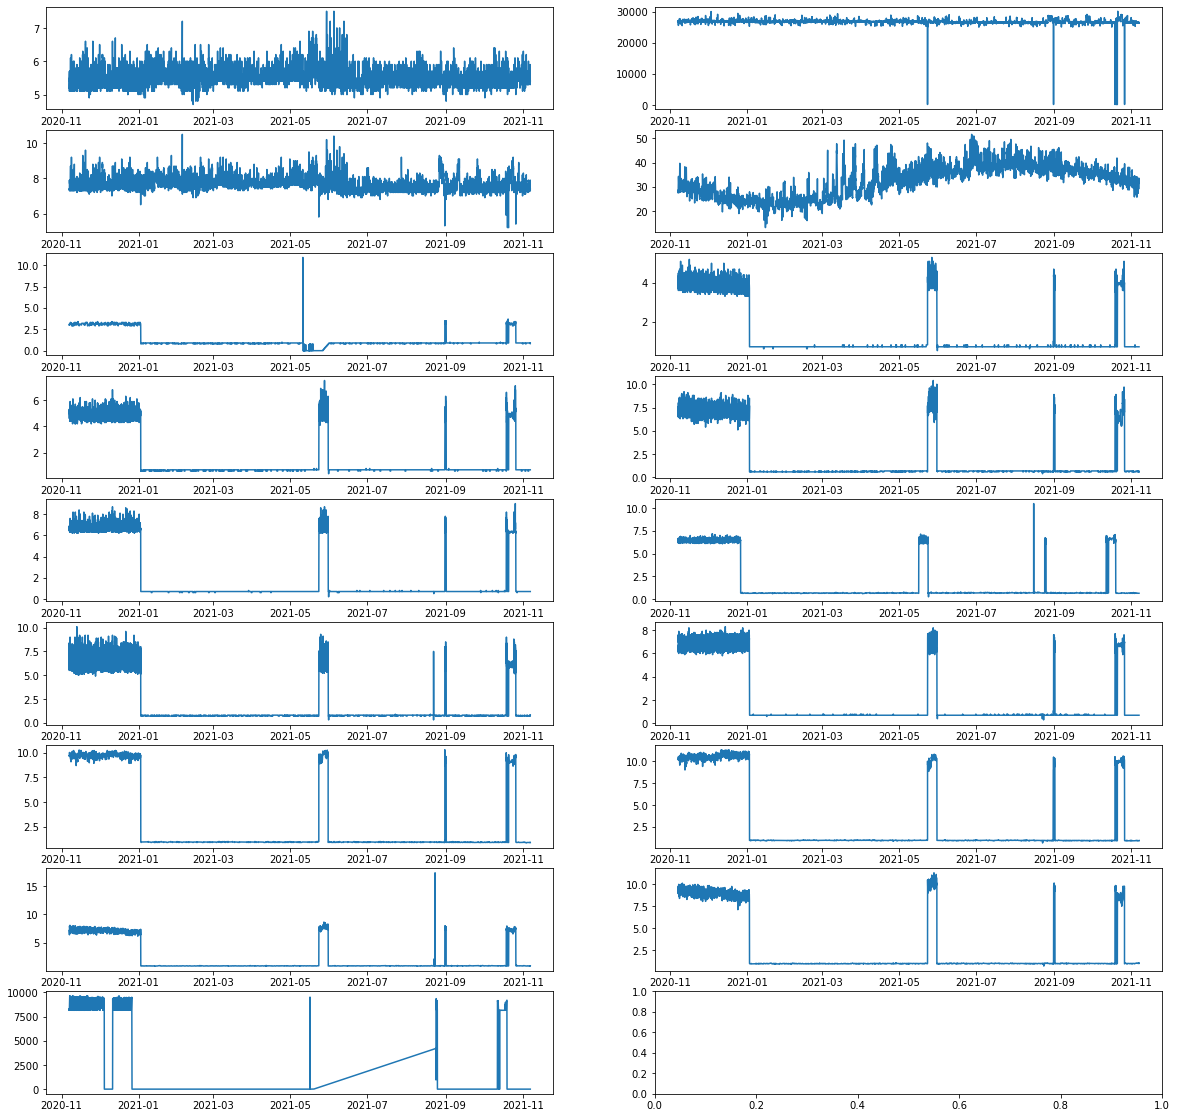

In [5]:
# visualize the data
fig, axs = plt.subplots(9,2, figsize=(20, 20))
axs[0, 0].plot(df['Date/Time'], df['Suction Pressure (Bar Gauge without Atmospheric pressure)'])
axs[0,1].plot(df['Date/Time'], df['Suction Flow (Nominal m3/hr)'])
axs[1, 0].plot(df['Date/Time'], df['Dischrage PreG1e without Atmospheric pressure)'])
axs[1,1].plot(df['Date/Time'], df['Suction Temperature (oC)'])
axs[2,0].plot(df['Date/Time'], df['Gear Box Output Shaft Drive End (DE) X Vibration (μm)'])
axs[2, 1].plot(df['Date/Time'], df['Gear Box Output Shaft Drive End (DE) Y Vibration (μm)'])
axs[3,0].plot(df['Date/Time'], df['Gear Box Output Shaft Non Drive End (NDE) X Vibration (μm)'])
axs[3, 1].plot(df['Date/Time'], df['Gear Box Output Shaft Non Drive End (NDE) Y Vibration (μm)'])
axs[4,0].plot(df['Date/Time'], df['Gear Box Input Shaft Non Drive End (NDE) X Vibration (μm)'])
axs[4, 1].plot(df['Date/Time'], df['Gear Box Input Shaft Drive End (NDE) Y Vibration (μm)'])
axs[5,0].plot(df['Date/Time'], df['Gear Box Input Shaft Drive End (DE) X Vibration (μm)'])
axs[5, 1].plot(df['Date/Time'], df['Gear Box Input Shaft Drive End (DE) Y Vibration (μm)'])
axs[6,0].plot(df['Date/Time'], df['Suction Vibration in x'])
axs[6, 1].plot(df['Date/Time'], df['Suction Vibration in y'])
axs[7,0].plot(df['Date/Time'], df['Discharge Vibration in x'])
axs[7, 1].plot(df['Date/Time'], df['Discharge Vibration in y'])
axs[8,0].plot(df['Date/Time'], df['Compressor speed (RPM)'])

In [6]:
df2=df.drop(columns=['Date/Time'])
df2

,Suction Pressure (Bar Gauge without Atmospheric pressure),Suction Flow (Nominal m3/hr),Suction Temperature (oC),Dischrage PreG1e without Atmospheric pressure),Discharge Temperature (oC),Gear Box Output Shaft Drive End (DE) X Vibration (μm),Gear Box Output Shaft Drive End (DE) Y Vibration (μm),Gear Box Output Shaft Non Drive End (NDE) X Vibration (μm),Gear Box Output Shaft Non Drive End (NDE) Y Vibration (μm),Gear Box Input Shaft Non Drive End (NDE) X Vibration (μm),Gear Box Input Shaft Drive End (NDE) Y Vibration (μm),Gear Box Input Shaft Drive End (DE) X Vibration (μm),Gear Box Input Shaft Drive End (DE) Y Vibration (μm),Suction Vibration in x,Suction Vibration in y,Discharge Vibration in x,Discharge Vibration in y,Compressor speed (RPM)
1,5.2,26812.4,28.5,7.4,55.2,3.0,4.0,5.0,6.8,6.6,6.60,6.9,7.4,9.727419,10.204235,7.166746,9.235712,8164.449219
2,5.2,26836.2,28.4,7.4,55.2,3.0,4.0,5.1,7.0,6.7,6.54,6.8,7.5,9.721112,10.209536,7.135931,9.235712,8161.888184
3,5.2,26856.7,28.3,7.4,55.2,3.1,4.0,5.3,7.3,6.7,6.46,5.7,7.4,9.714805,10.214835,7.105114,9.178102,8162.304688
4,5.2,26800.2,28.2,7.4,55.2,3.1,4.0,5.1,7.1,6.8,6.49,7.6,7.4,9.708497,10.220136,7.074298,9.116689,8315.385742
5,5.2,26852.4,28.1,7.4,55.3,3.1,4.2,5.0,6.7,6.7,6.61,7.6,7.5,9.702189,10.225435,7.043482,9.139559,8217.386719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26277,5.4,26471.1,30.1,7.3,28.4,0.9,0.7,0.7,0.6,0.7,0.65,0.7,0.7,0.906404,0.906404,0.951176,1.009405,0.000000
26278,5.4,26416.4,30.0,7.3,28.2,0.9,0.7,0.7,0.6,0.7,0.65,0.7,0.7,0.906404,0.906404,0.953478,1.009405,0.000000
26279,5.4,26412.1,29.8,7.4,28.0,0.9,0.7,0.7,0.7,0.7,0.65,0.7,0.7,0.906404,0.906404,0.955780,1.009405,0.000000
26280,5.4,26445.5,29.4,7.3,27.9,0.8,0.7,0.7,0.6,0.7,0.65,0.8,0.7,0.937772,0.956760,0.906404,0.989985,0.000000


In [7]:
df2 = df2.astype(float)
df2 = (df2-df2.min())/(df2.max()-df2.min())
df2

,Suction Pressure (Bar Gauge without Atmospheric pressure),Suction Flow (Nominal m3/hr),Suction Temperature (oC),Dischrage PreG1e without Atmospheric pressure),Discharge Temperature (oC),Gear Box Output Shaft Drive End (DE) X Vibration (μm),Gear Box Output Shaft Drive End (DE) Y Vibration (μm),Gear Box Output Shaft Non Drive End (NDE) X Vibration (μm),Gear Box Output Shaft Non Drive End (NDE) Y Vibration (μm),Gear Box Input Shaft Non Drive End (NDE) X Vibration (μm),Gear Box Input Shaft Drive End (NDE) Y Vibration (μm),Gear Box Input Shaft Drive End (DE) X Vibration (μm),Gear Box Input Shaft Drive End (DE) Y Vibration (μm),Suction Vibration in x,Suction Vibration in y,Discharge Vibration in x,Discharge Vibration in y,Compressor speed (RPM)
1,0.178571,0.890269,0.398964,0.415094,0.714754,0.275229,0.729167,0.647887,0.64,0.727273,0.619374,0.673469,0.8875,0.937862,0.896889,0.380891,0.804749,0.847359
2,0.178571,0.891064,0.396373,0.415094,0.714754,0.275229,0.729167,0.661972,0.66,0.738636,0.613503,0.663265,0.9000,0.937196,0.897387,0.379016,0.804749,0.847093
3,0.178571,0.891748,0.393782,0.415094,0.714754,0.284404,0.729167,0.690141,0.69,0.738636,0.605675,0.551020,0.8875,0.936529,0.897885,0.377141,0.799313,0.847136
4,0.178571,0.889862,0.391192,0.415094,0.714754,0.284404,0.729167,0.661972,0.67,0.750000,0.608611,0.744898,0.8875,0.935862,0.898383,0.375266,0.793518,0.863024
5,0.178571,0.891604,0.388601,0.415094,0.716393,0.284404,0.770833,0.647887,0.63,0.738636,0.620352,0.744898,0.9000,0.935195,0.898881,0.373392,0.795676,0.852853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26277,0.250000,0.878877,0.440415,0.396226,0.275410,0.082569,0.041667,0.042254,0.02,0.056818,0.037182,0.040816,0.0500,0.005302,0.023173,0.002724,0.028496,0.000000
26278,0.250000,0.877052,0.437824,0.396226,0.272131,0.082569,0.041667,0.042254,0.02,0.056818,0.037182,0.040816,0.0500,0.005302,0.023173,0.002864,0.028496,0.000000
26279,0.250000,0.876908,0.432642,0.415094,0.268852,0.082569,0.041667,0.042254,0.03,0.056818,0.037182,0.040816,0.0500,0.005302,0.023173,0.003004,0.028496,0.000000
26280,0.250000,0.878023,0.422280,0.396226,0.267213,0.073394,0.041667,0.042254,0.02,0.056818,0.037182,0.051020,0.0500,0.008619,0.027905,0.000000,0.026664,0.000000


In [8]:
multi=df2[['Suction Temperature (oC)','Discharge Temperature (oC)']]
# This is for each method
ocsvm=multi
gmm=multi
multi

,Suction Temperature (oC),Discharge Temperature (oC)
1,0.398964,0.714754
2,0.396373,0.714754
3,0.393782,0.714754
4,0.391192,0.714754
5,0.388601,0.716393
...,...,...
26277,0.440415,0.275410
26278,0.437824,0.272131
26279,0.432642,0.268852
26280,0.422280,0.267213


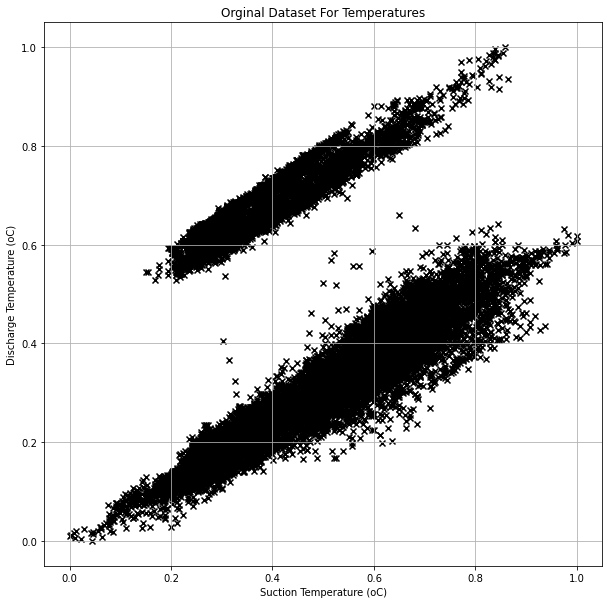

In [9]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(multi['Suction Temperature (oC)'],multi['Discharge Temperature (oC)'], marker='x', color='black')
plt.title("Orginal Dataset For Temperatures");
plt.xlabel("Suction Temperature (oC)");
plt.ylabel("Discharge Temperature (oC)");

# Gaussian Mixture Model

In [10]:
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from sklearn import mixture

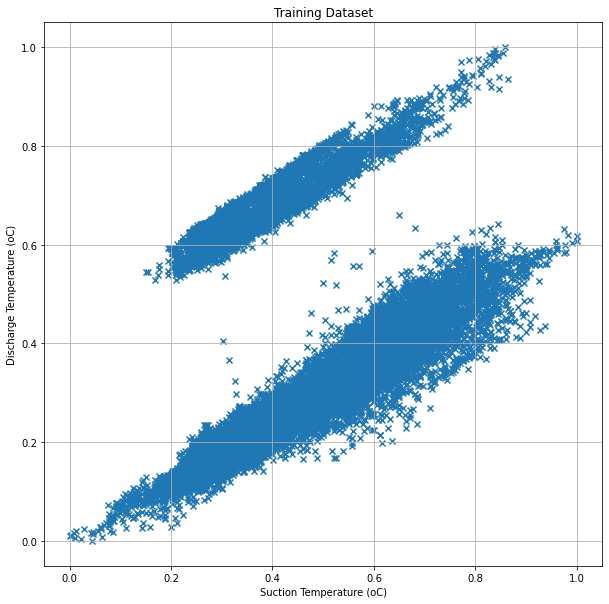

In [11]:
#Plot graph
X_train = np.array([gmm['Suction Temperature (oC)'], gmm['Discharge Temperature (oC)']]).T
plt.figure(figsize=(10,10))
plt.grid()
plt.scatter(X_train[:,0] ,X_train[:,1],marker="x");#Circle
plt.title("Training Dataset");
plt.xlabel("Suction Temperature (oC)");
plt.ylabel("Discharge Temperature (oC)");

In [12]:
# fit a Gaussian Mixture Model with two components
# Note for paramaters, kmeans:K-Means, random or kmeans++
components=2
clf1 = mixture.GaussianMixture(n_components=components, covariance_type="full", init_params='kmeans').fit(X_train)

> Maximum Value for Z: 184.4441841056244
> Minumum Value for Z: -3.0668116464456348


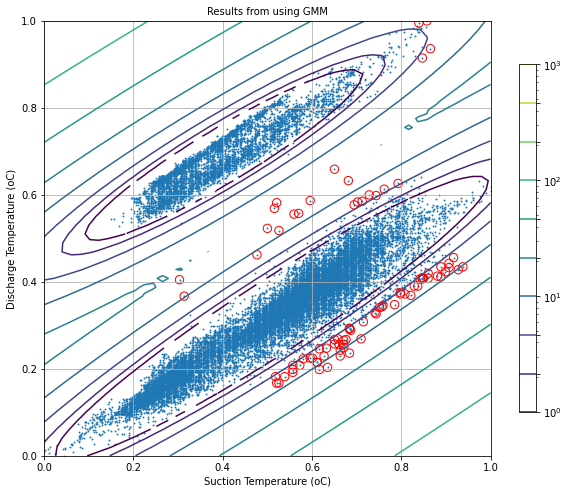

Number of outliers after setting a threshold of 5: 85


In [13]:
#Font Size#
title = 10
labels = 10

# display predicted scores by the model as a contour plot
x = np.linspace(0, 1)
y = np.linspace(0, 1)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf1.score_samples(XX)
Z = Z.reshape(X.shape)

x1=X
y1=Y
z1=Z

print(f"> Maximum Value for Z: {Z.max()}")
print(f"> Minumum Value for Z: {Z.min()}")

plt.figure(figsize=(10,8))
plt.grid()
CS = plt.contour(x1,y1,z1, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)

threshold=5

outliers = np.nonzero(-clf1.score_samples(X_train)>threshold)[0]
plt.scatter(X_train[outliers,0],X_train[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);

plt.title("Results from using GMM", fontsize=title)
plt.xlabel("Suction Temperature (oC)", fontsize=labels)
plt.ylabel("Discharge Temperature (oC)", fontsize=labels)
plt.axis("tight")
plt.savefig('2D Results from GMM.png')
plt.show()


print(f"Number of outliers after setting a threshold of {threshold}: {len(outliers)}")

In [14]:
def predict_range(outliers, win_size, density, thresh):
    filtered_outliers = []
    prev = 0
    for out in outliers:
        if out-prev > thresh:
            prev = out
            filtered_outliers.append(out)
    outliers = np.asarray(filtered_outliers)
    print(outliers.shape)
    
    ans = []
    curr_lo = outliers[0]
    curr_hi = outliers[0]
    curr_density = 0
    skip_to = 0
    for out in outliers[1:]:
        lo = out-win_size
        hi = out+win_size
        if lo < skip_to:
            continue
            
        # print(np.where((outliers > lo) & (outliers < hi))[0].size)
        vals = np.where((outliers > lo) & (outliers < hi))[0].size
        if vals > density:
            curr_hi = out
            ans.append([lo, hi])
            skip_to = hi
    return ans

(32,)


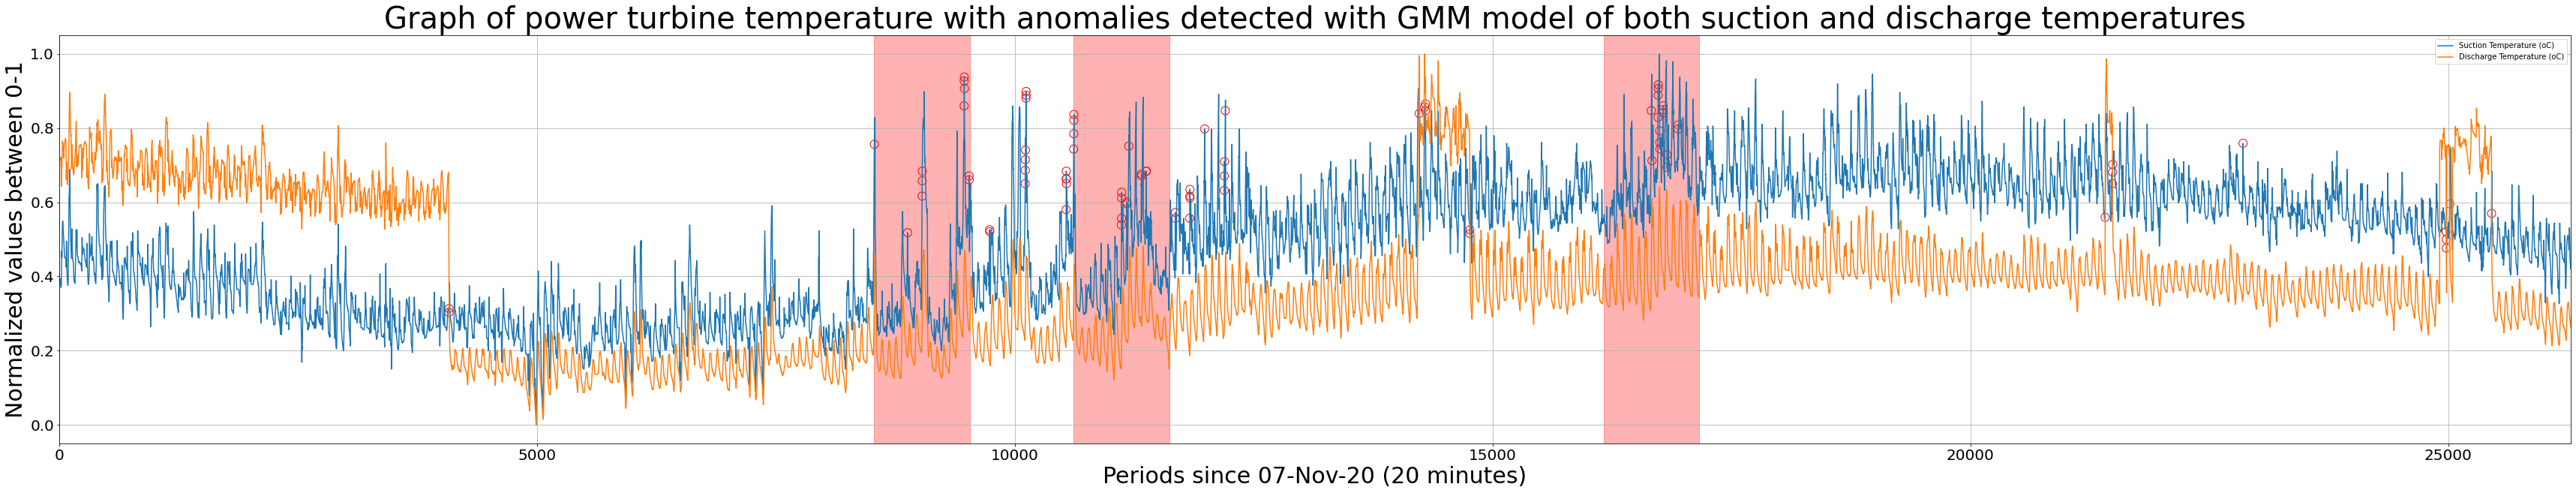

In [15]:
#Range Threshold
ranges = predict_range(outliers, 500, 3, 20)

#Font Sizes#
title = 40
labels = 30
ticks = 20

plt.figure(figsize=(60,10))
plt.grid()
plt.plot(X_train[:,0], label='Suction Temperature (oC)');#Circle
plt.plot(X_train[:,1], label='Discharge Temperature (oC)');
plt.scatter(outliers, X_train[outliers,0],marker="o",facecolor="none",color="r",s=120)
for r in ranges:
    plt.axvspan(r[0], r[1], color='red', alpha=0.3)


plt.xlim([0, len(X_train[:,0])])
plt.xticks(fontsize=ticks)
plt.yticks(fontsize=ticks)
plt.title("Graph of power turbine temperature with anomalies detected with GMM model of both suction and discharge temperatures",fontsize=title)
plt.xlabel("Periods since 07-Nov-20 (20 minutes)", fontsize=labels)
plt.ylabel("Normalized values between 0-1", fontsize=labels)
plt.legend(['Suction Temperature (oC)', 'Discharge Temperature (oC)'])
plt.savefig('Graph of power turbine temperature with anomalies detected with GMM model of both suction and discharge temperatures.png')

# Gaussian Mixture Model Using Pyod

In [16]:
# from pyod.models.gmm import GMM

In [17]:
# components=2
# clf1p = GMM(n_components=components, 
#                             covariance_type='full', 
#                             tol=0.001, reg_covar=1e-06, 
#                             max_iter=100, n_init=1, 
#                             init_params='kmeans', 
#                             weights_init=None, 
#                             means_init=None, 
#                             precisions_init=None, 
#                             random_state=None, 
#                             warm_start=False, 
#                             contamination=0.1).fit(X_train)

In [18]:
# display predicted scores by the model as a contour plot
# x = np.linspace(0, 1)
# y = np.linspace(0, 1)
# X, Y = np.meshgrid(x, y)
# XX = np.array([X.ravel(), Y.ravel()]).T
# Z = -clf1p.score_samples(XX)
# Z = Z.reshape(X.shape)

# x1=X
# y1=Y
# z1=Z

# print(f"> Maximum Value for Z: {Z.max()}")
# print(f"> Minumum Value for Z: {Z.min()}")

# plt.figure(figsize=(10,8))
# plt.grid()
# CS = plt.contour(x1,y1,z1, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
# CB = plt.colorbar(CS, shrink=0.8, extend="both")
# plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)

# threshold=5

# outliers = np.nonzero(-clf1p.score_samples(X_train)>threshold)[0]
# plt.scatter(X_train[outliers,0],X_train[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);

# plt.title("Results from using GMM", fontsize=title)
# plt.xlabel("Suction Temperature (oC)", fontsize=labels)
# plt.ylabel("Discharge Temperature (oC)", fontsize=labels)
# plt.axis("tight")
# plt.show()

# print(f"Number of outliers after setting a threshold of {threshold}: {len(outliers)}")

# Try 3D GMM for the suction

Ideal gas law: $PV=mRT$ or $P = \frac{mRT}{V}$

In [19]:
multi3D=df2[['Suction Pressure (Bar Gauge without Atmospheric pressure)', 'Suction Flow (Nominal m3/hr)', 'Suction Temperature (oC)',]]
multi3D

,Suction Pressure (Bar Gauge without Atmospheric pressure),Suction Flow (Nominal m3/hr),Suction Temperature (oC)
1,0.178571,0.890269,0.398964
2,0.178571,0.891064,0.396373
3,0.178571,0.891748,0.393782
4,0.178571,0.889862,0.391192
5,0.178571,0.891604,0.388601
...,...,...,...
26277,0.250000,0.878877,0.440415
26278,0.250000,0.877052,0.437824
26279,0.250000,0.876908,0.432642
26280,0.250000,0.878023,0.422280


Text(0.5, 0, 'Suction Temperature (oC)')

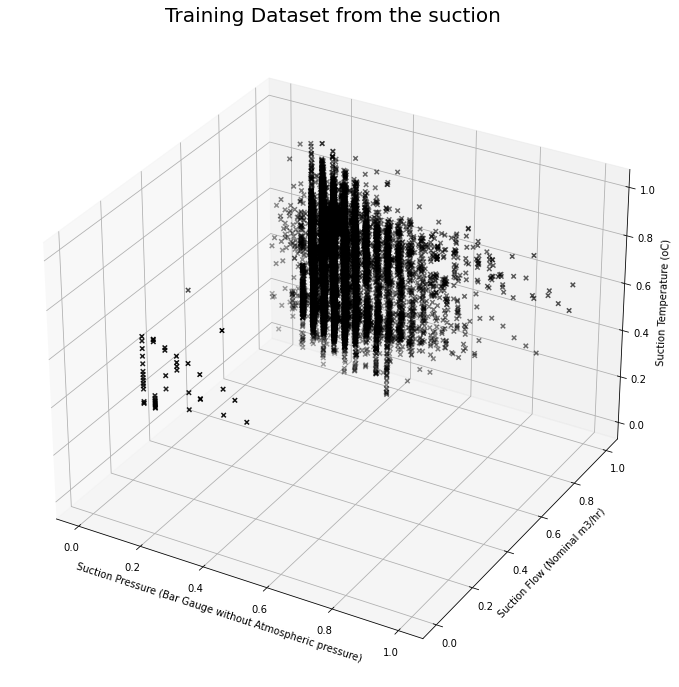

In [20]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

title = 20
labels = 10

#Plot graph
X_train = np.array([multi3D['Suction Pressure (Bar Gauge without Atmospheric pressure)'], multi3D['Suction Flow (Nominal m3/hr)'], multi3D['Suction Temperature (oC)']]).T
ax.scatter(X_train[:,0] ,X_train[:,1],X_train[:,2],marker="x", color='black');#Circle
ax.set_title("Training Dataset from the suction", fontsize=title)
ax.set_xlabel("Suction Pressure (Bar Gauge without Atmospheric pressure)", fontsize=labels)
ax.set_ylabel("Suction Flow (Nominal m3/hr)", fontsize=labels)
ax.set_zlabel("Suction Temperature (oC)", fontsize=labels)

In [21]:
components=5
clf2 = GaussianMixture(n_components=components, covariance_type="full", init_params='kmeans').fit(X_train)

Number of outliers after setting a threshold of 5: 24


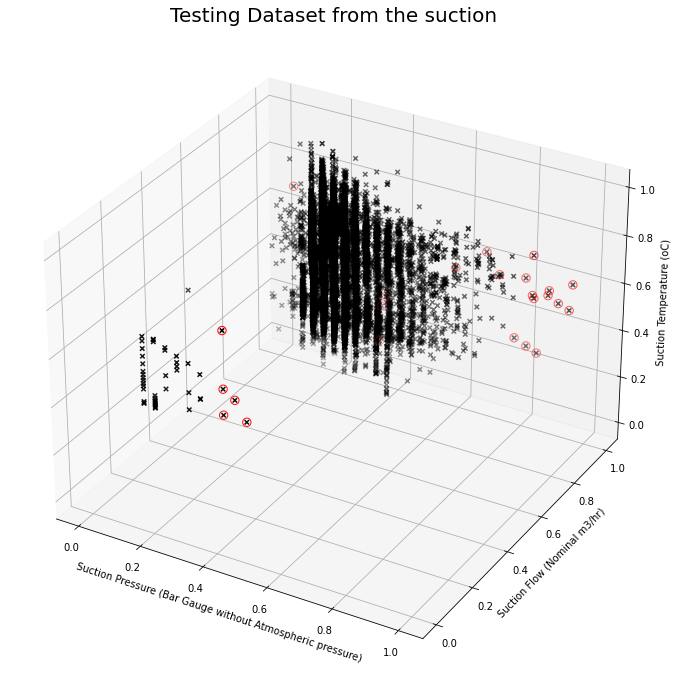

In [22]:
threshold=5

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

title = 20
labels = 10

#Plot graph
X_train = np.array([multi3D['Suction Pressure (Bar Gauge without Atmospheric pressure)'], multi3D['Suction Flow (Nominal m3/hr)'], multi3D['Suction Temperature (oC)']]).T
ax.scatter(X_train[:,0] ,X_train[:,1],X_train[:,2],marker="x", color='black');#Circle


outliers = np.nonzero(-clf2.score_samples(X_train)>threshold)[0]
ax.scatter(X_train[outliers,0],X_train[outliers,1],X_train[outliers,2],marker="o",facecolor="none",edgecolor="r",s=70);

ax.set_title("Gaussian mixture model anomaly detection", fontsize=title)
ax.set_title("Testing Dataset from the suction", fontsize=title)
ax.set_xlabel("Suction Pressure (Bar Gauge without Atmospheric pressure)", fontsize=labels)
ax.set_ylabel("Suction Flow (Nominal m3/hr)", fontsize=labels)
ax.set_zlabel("Suction Temperature (oC)", fontsize=labels)
plt.savefig('3D Results from GMM.png')
print(f"Number of outliers after setting a threshold of {threshold}: {len(outliers)}")

(16,)


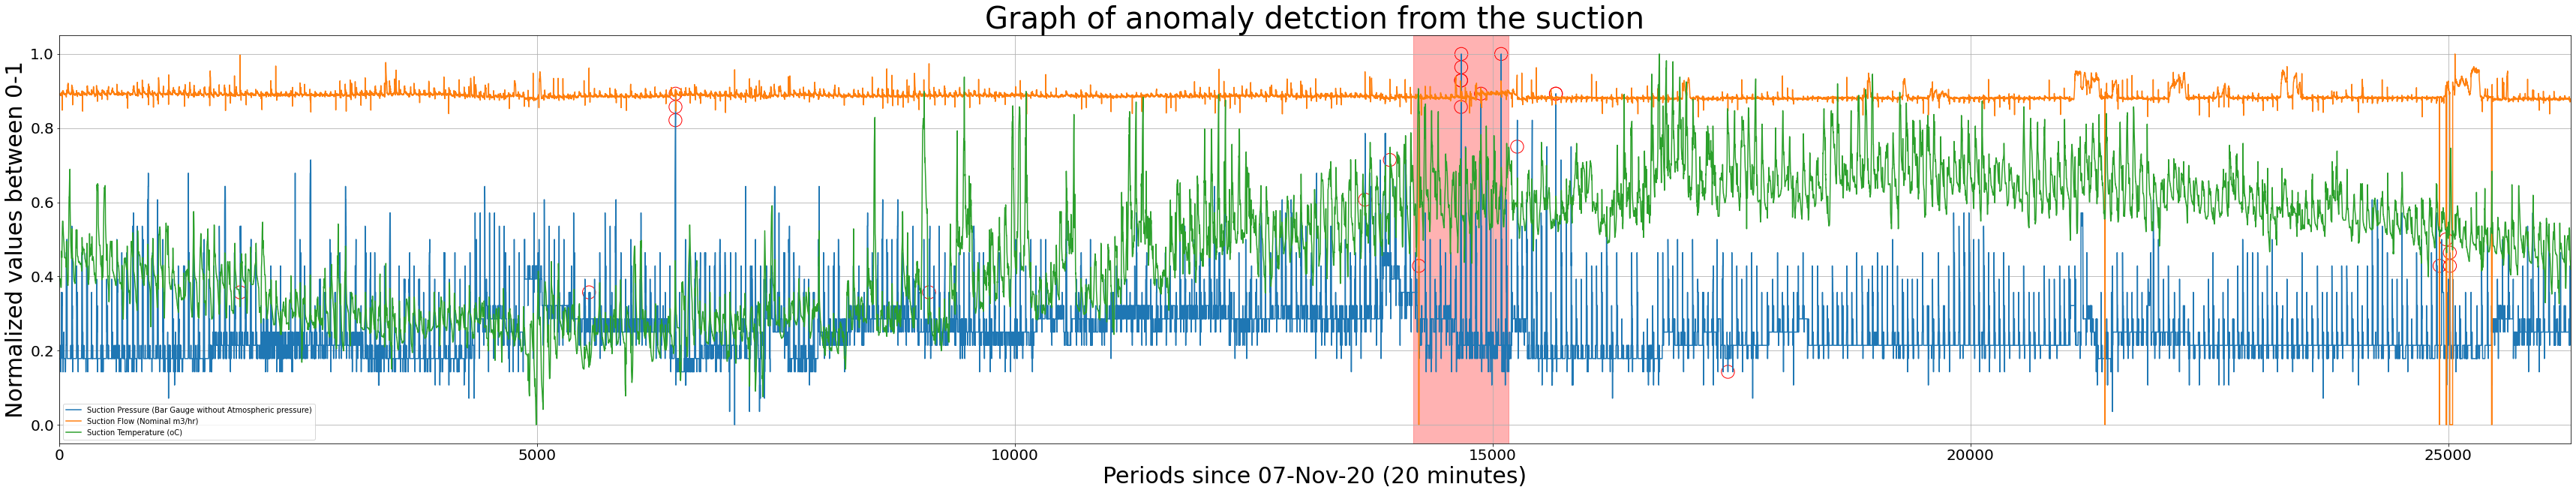

In [23]:
#Range Threshold
ranges = predict_range(outliers, 500, 3, 10)


#Font Sizes#
title = 40
labels = 30
ticks = 20

plt.figure(figsize=(60,10))
plt.grid()
plt.plot(X_train[:,0]);
plt.plot(X_train[:,1]);
plt.plot(X_train[:,2]);#Circle
plt.scatter(outliers, X_train[outliers,0],marker="o",facecolor="none",edgecolor="r",s=300)
for r in ranges:
    plt.axvspan(r[0], r[1], color='red', alpha=0.3)



plt.xlim([0, len(X_train[:,0])])
plt.xticks(fontsize=ticks)
plt.yticks(fontsize=ticks)
plt.title("Graph of anomaly detction from the suction",fontsize=title)
plt.xlabel("Periods since 07-Nov-20 (20 minutes)", fontsize=labels)
plt.ylabel("Normalized values between 0-1", fontsize=labels)
plt.legend(['Suction Pressure (Bar Gauge without Atmospheric pressure)', 'Suction Flow (Nominal m3/hr)', 'Suction Temperature (oC)'])
plt.savefig('Graph of power turbine temperature with anomalies detected with 3D GMM model.png')

# OCSVM

In [24]:
from sklearn.svm import OneClassSVM

In [25]:
X_train=np.array([gmm['Suction Temperature (oC)'], gmm['Discharge Temperature (oC)']]).T

In [26]:
clf_ocsvm = OneClassSVM(gamma='auto').fit(X_train)
clf_ocsvm.predict(X_train)
clf_ocsvm.score_samples(X_train)

array([11999.74513713, 11998.29163383, 11996.76113927, ...,
       12352.63624883, 12348.53578187, 12341.98805479])

In [27]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager

In [28]:
# Define "classifiers" to be used
classifiers = {
    #"Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
    #"Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(contamination=0.25),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
}
colors = ["m", "g", "b"]
legend1 = {}
legend2 = {}

# Get data
X1 = np.array([gmm['Suction Temperature (oC)'], gmm['Discharge Temperature (oC)']]).T  # two clusters

<Figure size 5760x1440 with 0 Axes>

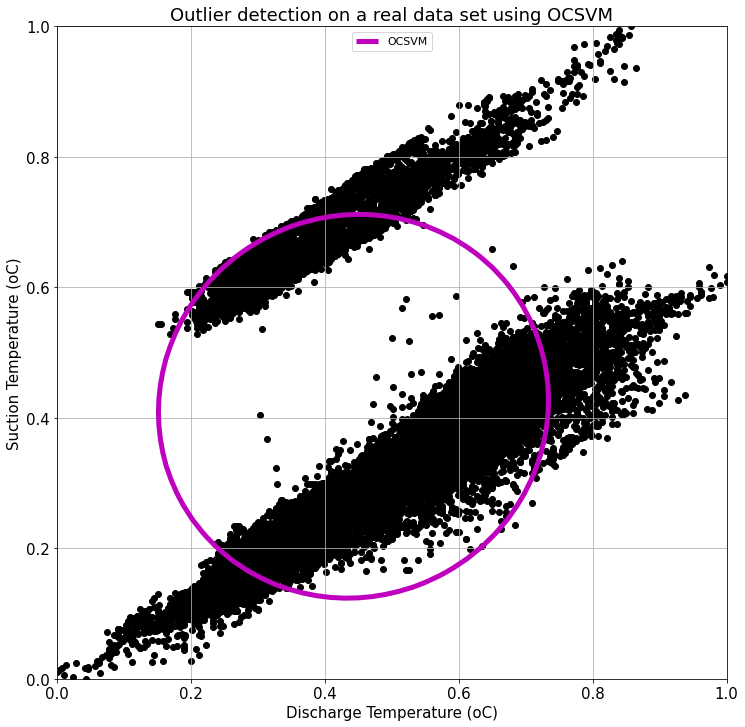

In [50]:
# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(figsize=(12,12))
    plt.figure(1)
    plt.grid()
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=5, colors=colors[i]
    )

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(figsize=(80,20))
plt.figure(1)  
plt.title("Outlier detection on a real data set using OCSVM")
plt.scatter(X1[:, 0], X1[:, 1], color="black")
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate(
    "outlying points",
    xy=(4, 2),
    xycoords="data",
    textcoords="data",
    xytext=(3, 1.25),
    bbox=bbox_args,
    arrowprops=arrow_args,
)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend(
    (
        legend1_values_list[0].collections[0],
        # legend1_values_list[1].collections[0],
        # legend1_values_list[2].collections[0],
    ),
    (
    legend1_keys_list[0], 
     #legend1_keys_list[1], 
     #legend1_keys_list[2]
    ),
    loc="upper center",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.ylabel("Suction Temperature (oC)")
plt.xlabel("Discharge Temperature (oC)")
plt.savefig('Graph of power turbine temperature from using OCSVM.png')
plt.show()

**According to the figure above, OCSVM is not the best idea for dataset with at least one cluster because the OSCVM takes an entire dataset as one cluster.**

# One-Class SVM versus One-Class SVM using Stochastic Gradient Descent

In [30]:
X1[:21024].shape[0]

21024

In [31]:
X1[21024:].shape[0]

5257

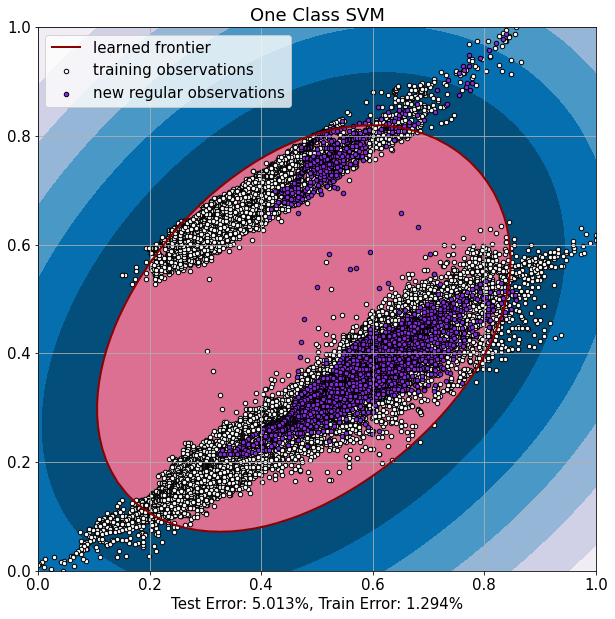

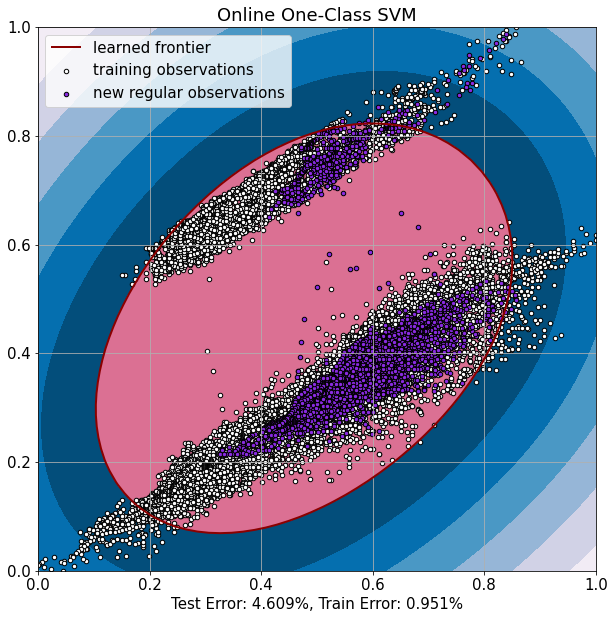

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.svm import OneClassSVM
from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline

font = {"weight": "normal", "size": 15}

matplotlib.rc("font", **font)

random_state = 42
rng = np.random.RandomState(random_state)

# Generate train data
X = X1
X_train = X1[:21024]
# Generate some regular novel observations
X_test = X1[21024:]
# Generate some abnormal novel observations
# X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

xx, yy = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))

# OCSVM hyperparameters
nu = 0.05
gamma = 2.0

# Fit the One-Class SVM
clf = OneClassSVM(gamma=gamma, kernel="rbf", nu=nu)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
# y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
# n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Fit the One-Class SVM using a kernel approximation and SGD
transform = Nystroem(gamma=gamma, random_state=random_state)
clf_sgd = SGDOneClassSVM(
    nu=nu, shuffle=True, fit_intercept=True, random_state=random_state, tol=1e-4
)
pipe_sgd = make_pipeline(transform, clf_sgd)
pipe_sgd.fit(X_train)
y_pred_train_sgd = pipe_sgd.predict(X_train)
y_pred_test_sgd = pipe_sgd.predict(X_test)
# y_pred_outliers_sgd = pipe_sgd.predict(X_outliers)
n_error_train_sgd = y_pred_train_sgd[y_pred_train_sgd == -1].size
n_error_test_sgd = y_pred_test_sgd[y_pred_test_sgd == -1].size
# n_error_outliers_sgd = y_pred_outliers_sgd[y_pred_outliers_sgd == 1].size

Z_sgd = pipe_sgd.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_sgd = Z_sgd.reshape(xx.shape)

# plot the level sets of the decision function
plt.figure(figsize=(10, 10))
plt.grid()
plt.title("One Class SVM")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 20
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
# c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.legend(
    [a.collections[0], b1, b2],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
)
plt.xlabel(
   (
        # n_error_train,
        # X_train.shape[0],
        # n_error_test,
        # X_test.shape[0],
        # n_error_outliers,
        # X_outliers.shape[0],
       (f"Test Error: {round((n_error_train/len(X_train))*100,3)}%, Train Error: {round((n_error_test/len(X_test))*100,3)}%")
    )
)
plt.show()

plt.figure(figsize=(10, 10))
plt.grid()
plt.title("Online One-Class SVM")
plt.contourf(xx, yy, Z_sgd, levels=np.linspace(Z_sgd.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z_sgd, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z_sgd, levels=[0, Z_sgd.max()], colors="palevioletred")

s = 20
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
# c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.legend(
    [a.collections[0], b1, b2],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
)
plt.xlabel(
    (
        (f"Test Error: {round((n_error_train_sgd/len(X_train))*100,3)}%, Train Error: {round((n_error_test_sgd/len(X_test))*100,3)}%")
        
        # n_error_train_sgd,
        # X_train.shape[0],
        # n_error_test_sgd,
        # X_test.shape[0],
        # n_error_outliers_sgd,
        # X_outliers.shape[0],
    )
)
plt.show()

# One-class SVM with non-linear kernel (RBF)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))
# Generate train data
X = X1
X_train = X1[:21024]
# Generate some regular novel observations
X_test = X1[21024:]
# Generate some abnormal novel observations
# X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [34]:
# fit the model 0.1, 0.1
nu=0.05
gamma=0.05

clf = svm.OneClassSVM(nu=nu, kernel="rbf", gamma=gamma)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
# y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
# n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

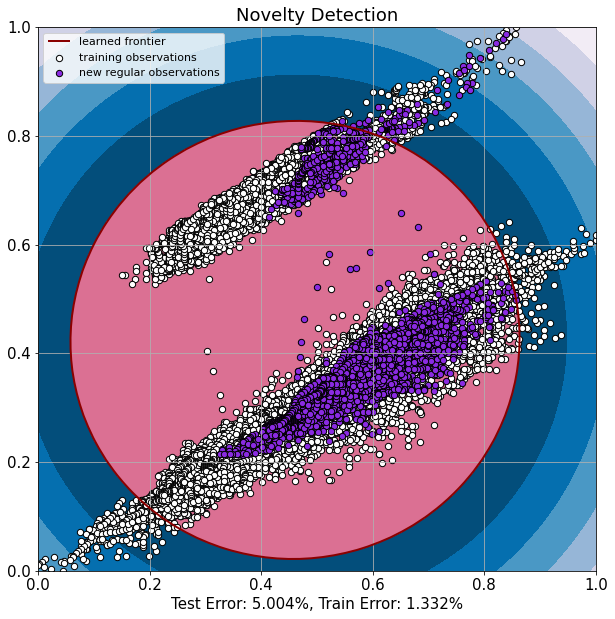

In [35]:
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 10))
plt.grid()
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
# c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.legend(
    [a.collections[0], b1, b2],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
    (f"Test Error: {round((n_error_train/len(X_train))*100,3)}%, Train Error: {round((n_error_test/len(X_test))*100,3)}%")
)
plt.show()

# K-Means?

In [36]:
from sklearn.cluster import KMeans
from matplotlib.colors import LogNorm
import numpy as np

X_train = np.array([gmm['Suction Temperature (oC)'], gmm['Discharge Temperature (oC)']]).T
X_train

array([[0.39896373, 0.7147541 ],
       [0.39637306, 0.7147541 ],
       [0.39378238, 0.7147541 ],
       ...,
       [0.43264249, 0.26885246],
       [0.42227979, 0.26721311],
       [0.41968912, 0.26393443]])

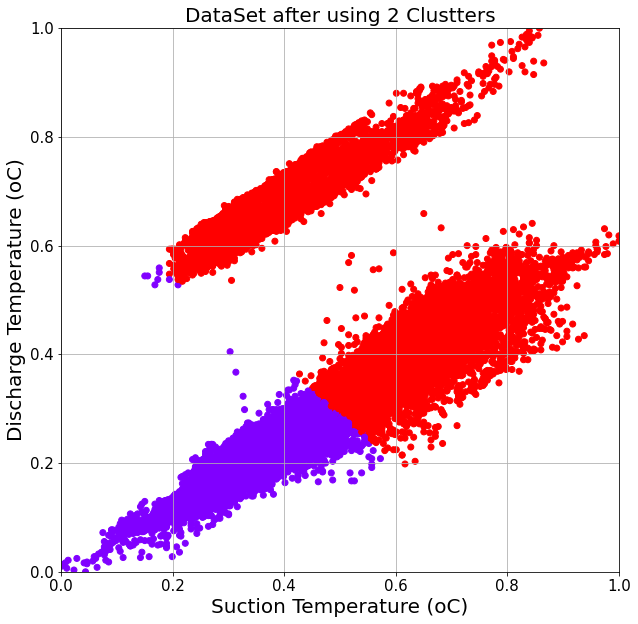

In [37]:
k=2 # Here, you can play with the number of clusters
runs=100 #Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

kmeans = KMeans(n_clusters = k, init='random', n_init=runs).fit(X_train)
kmeans

# This is for the clustering results
fontsize=20
identified_clusters = kmeans.fit_predict(X_train)

data_with_clusters = df2.copy()
data_with_clusters['Clusters']=identified_clusters
plt.figure(figsize=(10,10))
plt.grid()
plt.scatter(data_with_clusters['Suction Temperature (oC)'], data_with_clusters['Discharge Temperature (oC)'], c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlim(0, 1)
plt.xlabel("Suction Temperature (oC)", fontsize=fontsize)
plt.ylim(0, 1)
plt.ylabel("Discharge Temperature (oC)", fontsize=fontsize)
plt.title(f'DataSet after using {k} Clustters', fontsize=fontsize)
plt.show()

# Outlier Detection Using K-means Clustering In Python

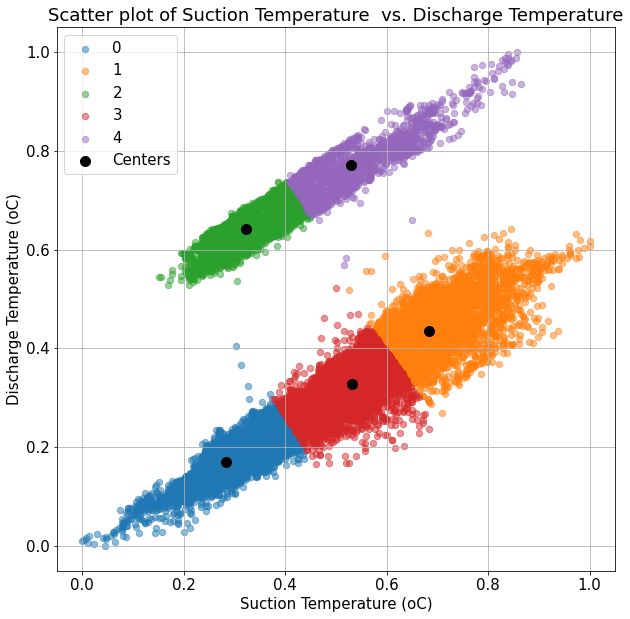

In [38]:
XKMeans=X_train

clusters=5
km = KMeans(n_clusters=clusters)
model = km.fit(XKMeans)

# colors=["red","blue","green","orange"]
# figure setting
plt.figure(figsize=(10,10))
plt.grid()
for i in range(np.max(model.labels_)+1):
    # plt.scatter(XKMeans[model.labels_==i,0], XKMeans[model.labels_==i,1], label=i, c=colors[i], alpha=0.5, s=40)
    plt.scatter(XKMeans[model.labels_==i,0], XKMeans[model.labels_==i,1], label=i, alpha=0.5, s=40)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of Customer Data",size=20)
plt.xlabel("Suction Temperature (oC)")
plt.ylabel("Discharge Temperature (oC)")
plt.title('Scatter plot of Suction Temperature  vs. Discharge Temperature')
plt.legend()
plt.show()

In [39]:
# Create new columns: label, distance
def distance_from_center(x_feature, y_feature, label):
    '''
    Calculate the Euclidean distance between a data point and the center of its cluster.
    :param float x_feature: the standardized x_feature of the data point 
    :param float y_feature: the standardized y_feature of the data point 
    :param int label: the label of the cluster
    :rtype: float
    :return: The resulting Euclidean distance  
    '''
    x_feature_center =  model.cluster_centers_[:,0]
    y_feature_center =  model.cluster_centers_[:,1]
    
    # distance = np.sqrt((x_feature - x_feature_center) ** 2 + (y_feature - y_feature_center) ** 2)
    distance=[]
    for i in range(len(x_feature)):
        for j in range(len(x_feature_center)):
            d=np.sqrt((x_feature[i] - x_feature_center[j]) ** 2 + (y_feature[i] - y_feature_center[j]) ** 2)
            distance.append(d)
    return np.round(distance, 3)


label = model.labels_
suction=XKMeans[:,0]
discharge=XKMeans[:,1]
#XKMeans['distance'] = distance_from_center(XKMeans['Suction Temperature (oC)'], XKMeans['Discharge Temperature (oC)'], XKMeans.label)
distance = distance_from_center(suction, discharge, label)
print(distance)
print(f"Distance Shape: {distance.shape}")

[0.556 0.399 0.105 ... 0.391 0.129 0.519]
Distance Shape: (131405,)


In [40]:
distance2=np.reshape(distance, [len(XKMeans),clusters])

In [41]:
XKMeans

array([[0.39896373, 0.7147541 ],
       [0.39637306, 0.7147541 ],
       [0.39378238, 0.7147541 ],
       ...,
       [0.43264249, 0.26885246],
       [0.42227979, 0.26721311],
       [0.41968912, 0.26393443]])

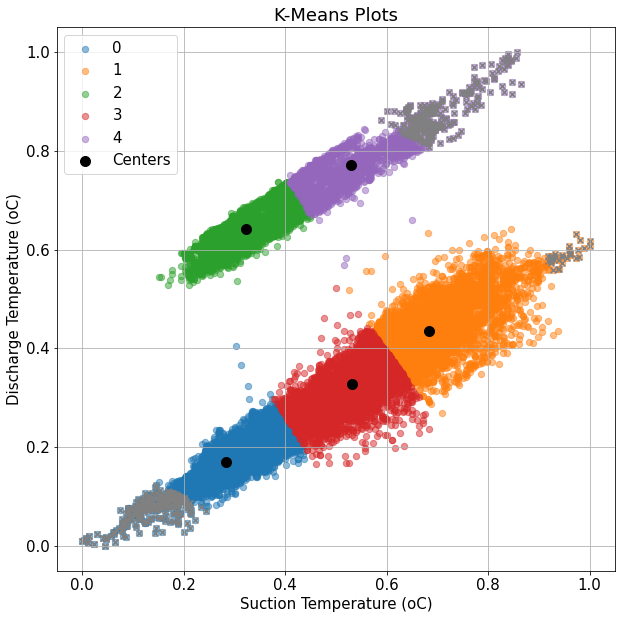

In [47]:
XKMeans2=pd.DataFrame(XKMeans, columns=["Suction Temperature (oC)","Discharge Temperature (oC)"])
XKMeans3=pd.DataFrame(distance2, columns=["Distance to center 1", "Distance to center 2", "Distance to center 3", "Distance to center 4", "Distance to center 5"])
df10=pd.concat([XKMeans2, XKMeans3], axis='columns')

anomaly1=[]
anomaly2=[]
anomaly3=[]
anomaly4=[]
anomaly5=[]

threshold=0.75

for i in range(len(df10)):
    if df10['Distance to center 1'].iloc[i] > threshold:
        anomaly1.append(1)
    else:
        anomaly1.append(0)

for i in range(len(df10)):
    if df10['Distance to center 2'].iloc[i] > threshold:
        anomaly2.append(1)
    else:
        anomaly2.append(0)

for i in range(len(df10)):
    if df10['Distance to center 3'].iloc[i] > threshold:
        anomaly3.append(1)
    else:
        anomaly3.append(0)

for i in range(len(df10)):
    if df10['Distance to center 4'].iloc[i] > threshold:
        anomaly4.append(1)
    else:
        anomaly4.append(0)

for i in range(len(df10)):
    if df10['Distance to center 5'].iloc[i] > threshold:
        anomaly5.append(1)
    else:
        anomaly5.append(0)
        
anomaly=np.array([anomaly1, anomaly2, anomaly3, anomaly4, anomaly5]).T

anomaly_distances=pd.DataFrame(anomaly, columns=["Distance to center 1 Anomaly", "Distance to center 2 Anomaly", "Distance to center 3 Anomaly", "Distance to center 4 Anomaly", "Distance to center 5 Anomaly"])

df10=pd.concat([df10, anomaly_distances], axis='columns')

# figure setting
plt.figure(figsize=(10,10))
plt.grid()
for i in range(np.max(model.labels_)+1):
    plt.scatter(XKMeans[model.labels_==i,0], XKMeans[model.labels_==i,1], label=i, alpha=0.5, s=40)
for i in range(len(df10)):
    if df10['Distance to center 1 Anomaly'].iloc[i] == 1:
        plt.scatter(df10['Suction Temperature (oC)'].iloc[i], df10['Discharge Temperature (oC)'].iloc[i], c='grey', marker='x')
    if df10['Distance to center 2 Anomaly'].iloc[i] == 1:
        plt.scatter(df10['Suction Temperature (oC)'].iloc[i], df10['Discharge Temperature (oC)'].iloc[i], c='grey', marker='x')
    if df10['Distance to center 3 Anomaly'].iloc[i] == 1:
        plt.scatter(df10['Suction Temperature (oC)'].iloc[i], df10['Discharge Temperature (oC)'].iloc[i], c='grey', marker='x')
    if df10['Distance to center 4 Anomaly'].iloc[i] == 1:
        plt.scatter(df10['Suction Temperature (oC)'].iloc[i], df10['Discharge Temperature (oC)'].iloc[i], c='grey', marker='x')
    if df10['Distance to center 5 Anomaly'].iloc[i] == 1:
        plt.scatter(df10['Suction Temperature (oC)'].iloc[i], df10['Discharge Temperature (oC)'].iloc[i], c='grey', marker='x')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering",size=20)
plt.xlabel("Suction Temperature (oC)")
plt.ylabel("Discharge Temperature (oC)")
plt.title('K-Means Plots')
plt.legend()
plt.savefig('Graph of power turbine temperature from using KMeans.png')

In [43]:
# plt.figure(figsize=(10,10))
# for i in range(len(df10)):
#     if df10['Distance to center 1 Anomaly'].iloc[i] == 1:
#         plt.scatter(df10['Suction Temperature (oC)'].iloc[i], df10['Discharge Temperature (oC)'].iloc[i], c='red', marker='x')
#     if df10['Distance to center 2 Anomaly'].iloc[i] == 1:
#         plt.scatter(df10['Suction Temperature (oC)'].iloc[i], df10['Discharge Temperature (oC)'].iloc[i], c='red', marker='x')
#     if df10['Distance to center 3 Anomaly'].iloc[i] == 1:
#         plt.scatter(df10['Suction Temperature (oC)'].iloc[i], df10['Discharge Temperature (oC)'].iloc[i], c='red', marker='x')
#     if df10['Distance to center 4 Anomaly'].iloc[i] == 1:
#         plt.scatter(df10['Suction Temperature (oC)'].iloc[i], df10['Discharge Temperature (oC)'].iloc[i], c='red', marker='x')
#     if df10['Distance to center 5 Anomaly'].iloc[i] == 1:
#         plt.scatter(df10['Suction Temperature (oC)'].iloc[i], df10['Discharge Temperature (oC)'].iloc[i], c='red', marker='x')
# plt.show()

In [44]:
# plt.figure(figsize=(25,5))
# plt.grid()
# plt.plot(df10['Distance to center 1'])
# plt.plot(df10['Distance to center 2'])
# plt.plot(df10['Distance to center 3'])
# plt.plot(df10['Distance to center 4'])
# plt.plot(df10['Distance to center 5'])

In [45]:
# outliers_idx = list(XKMeans.sort_values(distance, ascending=False).head(10).index)
# outliers = XKMeans[XKMeans.index.isin(outliers_idx)]
# print(outliers)

**Also K-Means may not be the best method to detect outliers, it is obvious that the K-Means is a simplified version of the GMM. This is because the shape of the distribution is not taken into consideration, instead it is the Eucledian distance that is important for the K-Means. There are pionts close to the centroids but they are outside of the distribution, which is the opposite of what we wanted for anomaly detection.** 